In [1]:
import matplotlib.pylab as plt

from sklearn import metrics

import numpy as np

In [2]:
# Crear tres distribuciones con datos aleatorios
MAXN=40 # Valor máximo para los datos
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

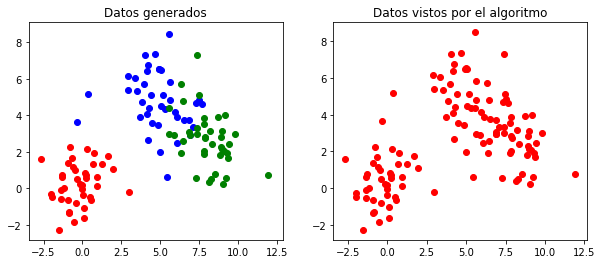

In [3]:
# Crear etiquetas para 3 distribuciones con fines de visualización
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Datos generados')
fig = plt.gcf()
fig.set_size_inches((10,4))

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Datos vistos por el algoritmo')
fig = plt.gcf()
fig.set_size_inches((10,4))

In [ ]:
from sklearn import cluster

K=3 # Asumiendo que existen 3 clusters

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

In [ ]:
# Obtener las clases de los datos de entrenamiento
print (clf.labels_)    # usando el atributo labels_
print (clf.predict(X)) # equivalente, con el método predict

In [ ]:
print (X[(y==1).ravel(),0]) #numpy.ravel() regresa un arreglo plano
print (X[(y==1).ravel(),1])

In [ ]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [ ]:
# Se generan nuevos datos para probar el predictor
x = np.linspace(-5,15,200) # genera 200 números en el intervalo -5..15
XX,YY = np.meshgrid(x,x) # Obtiene coordenadas de una matriz
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()] 
    # c_ transforma objetos individuales a concatenaciones en el segundo eje.

In [ ]:
# Se predice la clase de los nuevos datos
Z=clf.predict(data) # regresa las etiquetas de los datos
print (Z) # Imprime las etiquetas de los datos

In [ ]:
# Visualización de las particiones espaciales
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Particiones espaciales', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [ ]:
clf = cluster.KMeans(n_clusters=K, random_state=0) 
    # Inicializar la clasificación por k-means
clf.fit(X) # ejecutar el método k-means

data=np.c_[XX.ravel(),YY.ravel()] 
Z=clf.predict(data) # regresar las etiquetas de las clases

In [ ]:
plt.title('Resultado final de K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

In [ ]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0) 
    # Inicializar la clasificación k-means
clf.fit(X) # ejecutar la clasificación k-means
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Etiquetas originales', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Datos sin etiquetas', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')  # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Etiquetas de clasificación', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))

In [ ]:
clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, max_iter=300, n_init=10) 
                                        # Inicializar la clasificación k-means
clf.fit(X)                              # ejecutar la clasificación k-means

print ('Evaluación final de la clasificación:')

print('Inercia: %.2f' %  clf.inertia_)

print('Índice aleatorio ajustado %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))

print('Homogeneidad %.2f' %  metrics.homogeneity_score(y.ravel(), clf.labels_))

print('Completitud %.2f' %  metrics.completeness_score(y.ravel(), clf.labels_))
             
print('medida V %.2f' %  metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silueta %.2f' %  metrics.silhouette_score(X, clf.labels_, metric='euclidean'))

In [ ]:
clf1 = cluster.KMeans(n_clusters=K,  init='random', random_state=0, max_iter=2, n_init=2) 
                                    # Inicializar la clasificación k-means
clf1.fit(X)                         # ejecutar la clasificación k-means

print ('Evaluación final de la clasificación:')

print ('Inercia: %.2f' % clf1.inertia_)

print ('Índice aleatorio ajustado %.2f' % metrics.adjusted_rand_score(y.ravel(), clf1.labels_))

print ('Homogeneidad %.2f' % metrics.homogeneity_score(y.ravel(),  clf1.labels_))

print ('Completitud %.2f' % metrics.completeness_score(y.ravel(), clf1.labels_))
             
print ('medida V %.2f' % metrics.v_measure_score(y.ravel(), clf1.labels_))

print ('Silueta %.2f' % metrics.silhouette_score(X, clf1.labels_, metric='euclidean'))

In [ ]:
print('Índice aleatorio ajustado %.2f' % metrics.adjusted_rand_score(y.ravel(), clf.labels_))